# Exercício

1. Carregue o arquivo FakeTweetBr.csv em um dataframe df.

In [1]:
import pandas as pd

df = pd.read_csv('FakeTweetBr.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,id,subject,text,classificacao,date,retweets,favorites,permalink
0,1.124513e+18,macaco marielle,Marielle >BANDIDOS Narco-traficantes-Milícias ...,fake,2019-05-04 0:16,0,0,https://twitter.com/MRTT_/status/1124513050218...
1,1.124049e+18,macaco marielle,"Bem, as últimas noticias a respeito disso que ...",fake,2019-05-02 17:33,0,0,https://twitter.com/EvaristoKlebber/status/112...
2,1.119295e+18,macaco marielle,@jornalnacional convivi com notícias da Mariel...,fake,2019-04-19 14:41,0,0,https://twitter.com/luiztemper/status/11192950...
3,1.114583e+18,macaco marielle,"O Cesari Battisti confessou seus crimes, a esq...",fake,2019-04-06 14:36,0,0,https://twitter.com/GrimoaldoL/status/11145825...
4,1.113246e+18,macaco marielle,[Agência Lupa] Verificamos: É falso que Thiago...,true,2019-04-02 22:04,1,0,https://twitter.com/antmarobel/status/11132459...


In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
import string 
from tqdm import tqdm

import spacy
from spacy.lang.pt.stop_words import STOP_WORDS
from tqdm import tqdm

2. Crie um $corpus$ textual através da coluna $text$ e represente, para cada texto, sua forma vetorial através dos métodos $\textit{Bag of Words}$, $\textit{TF-IDF}$ e mais dois outros métodos baseado em Deep Learning (obter no  $hugging face$).

In [3]:
!python3.10 -m spacy download pt_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 45.2 MB/s eta 0:00:00 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_sm')


In [4]:
pln=spacy.load("pt_core_news_sm")
stop_words=STOP_WORDS
pontuacoes=string.punctuation
pontuacoes=pontuacoes+"..."+' '

In [5]:
def processamento(texto):
    texto=texto.lower()
    documento=pln(texto)
    lista1=[]
    for p in documento :
        lista1.append(p.lemma_)#lematização
    lista2=[]
    for p in lista1:
        if (p in stop_words)==False:
            lista2.append(p)
    lista3=[]
    for p in lista2:
        if (p in pontuacoes)==False:
            lista3.append(p)
            
        
    return lista3

In [6]:
textoall=pd.Series(df['text'].dropna().values).apply(processamento)
textoall

0      [marielle, bandido, narco-traficantes-milícia,...
1      [noticia, respeito, de isso, verdadeiro, assas...
2      [@jornalnacional, convivi, notícia, de o, mari...
3      [Cesari, battisti, confessar, crime, esquerda,...
4      [agência, lupo, verificar, falso, thiago, maca...
                             ...                        
274    [“, ruptura, corrupção, ”, brasileiro, aparece...
275    [pessoal, revista, americano, time, incluir, j...
276    [começar, mimimi, de o, bolsoburro, jair, Bols...
277    [circular, em o, rede, social, foto, de o, cap...
278    [circular, por o, rede, social, publicação, af...
Length: 279, dtype: object

In [7]:
corpus=textoall.apply(lambda x: ' '.join(x))
corpus

0      marielle bandido narco-traficantes-milícia pis...
1      noticia respeito de isso verdadeiro assassino ...
2      @jornalnacional convivi notícia de o marielle ...
3      Cesari battisti confessar crime esquerda calar...
4      agência lupo verificar falso thiago macaco ide...
                             ...                        
274    “ ruptura corrupção ” brasileiro aparecer ‘ 10...
275    pessoal revista americano time incluir jair bo...
276    começar mimimi de o bolsoburro jair Bolsonaro ...
277    circular em o rede social foto de o capa de o ...
278    circular por o rede social publicação afirmar ...
Length: 279, dtype: object

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Bag of Words
cv=CountVectorizer(tokenizer=processamento,stop_words=None,token_pattern=None)
X_bow=cv.fit_transform(corpus)
X_bow.toarray()

vocabularioBow=cv.get_feature_names_out()
vocabularioBow

array(['):', '-30', '-sérgio', ..., '“', '”', '…'], dtype=object)

In [9]:
#TF-IDF
tfidf=TfidfVectorizer(tokenizer=processamento,stop_words=None,token_pattern=None)
X_tfidf=tfidf.fit_transform(corpus)
X_tfidf.toarray()

vocabularioTfidf=tfidf.get_feature_names_out()
vocabularioTfidf

array(['):', '-30', '-sérgio', ..., '“', '”', '…'], dtype=object)

In [10]:
from sentence_transformers import SentenceTransformer

model=SentenceTransformer('alfaneo/bertimbau-base-portuguese-sts')

X_bert=model.encode(corpus)
X_bert

array([[ 0.07740567,  0.5260557 , -0.16092922, ..., -0.29797927,
         0.43814307, -0.45120567],
       [ 0.07397877, -0.4648875 , -0.08954995, ..., -0.50710046,
         0.05123941,  0.03417988],
       [ 0.23615049, -0.05102448, -0.33671102, ..., -0.5541216 ,
         0.04893181, -0.22962333],
       ...,
       [-0.33889753, -0.02541978,  0.52454007, ..., -0.20851114,
        -0.6009589 , -0.3981548 ],
       [-0.29252866,  0.04453065,  0.5344818 , ..., -0.27503487,
        -0.3023428 , -0.65057   ],
       [-0.14084773, -0.4023391 ,  0.8138346 , ..., -0.6793936 ,
         0.05583872, -0.587293  ]], dtype=float32)

In [11]:
from sentence_transformers import SentenceTransformer

model=SentenceTransformer('neuralmind/bert-base-portuguese-cased')

X_bert_neural=model.encode(corpus)
X_bert_neural

No sentence-transformers model found with name neuralmind/bert-base-portuguese-cased. Creating a new one with mean pooling.


array([[ 0.02489648, -0.17753732,  0.19350234, ..., -0.0265745 ,
        -0.00936026, -0.17722248],
       [ 0.10019585, -0.5292255 ,  0.09554109, ..., -0.07396646,
         0.10944336, -0.14750572],
       [ 0.21582519, -0.44644824,  0.25152323, ..., -0.05429944,
         0.09362947, -0.26673877],
       ...,
       [-0.02874576, -0.38789937,  0.5248066 , ...,  0.23877019,
        -0.30743563, -0.076271  ],
       [-0.03442947, -0.28343862,  0.5865404 , ..., -0.02493171,
        -0.11405404, -0.36404315],
       [-0.13803135, -0.19216037,  0.41055983, ..., -0.08074851,
         0.00794991, -0.3975423 ]], dtype=float32)

3. Para cada método, calcule o f1_score e a acurácia para fazer a predição do texto baseado na coluna CLASSIFICACAO.  

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

X_train_bow, X_test_bow, y_train_bow, y_test_bow = train_test_split(X_bow, df['classificacao'], test_size=0.3, random_state=42)
lr_bow = LogisticRegression(max_iter=1000)
lr_bow.fit(X_train_bow, y_train_bow)
y_pred_bow = lr_bow.predict(X_test_bow)
f1_bow = f1_score(y_test_bow, y_pred_bow, average='weighted')
acc_bow = accuracy_score(y_test_bow, y_pred_bow)

print(f'F1 Score BOW: {f1_bow} - Acurácia BOW: {acc_bow}')

F1 Score BOW: 0.8411798727588201 - Acurácia BOW: 0.8571428571428571


In [13]:

X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, df['classificacao'], test_size=0.3, random_state=42)
lr_tfidf = LogisticRegression(max_iter=1000)
lr_tfidf.fit(X_train_tfidf, y_train_tfidf)
y_pred_tfidf = lr_tfidf.predict(X_test_tfidf)
f1_tfidf = f1_score(y_test_tfidf, y_pred_tfidf, average='weighted')
acc_tfidf = accuracy_score(y_test_tfidf, y_pred_tfidf)
print(f'F1 Score TF-IDF: {f1_tfidf} - Acurácia TF-IDF: {acc_tfidf}')

F1 Score TF-IDF: 0.65578231292517 - Acurácia TF-IDF: 0.7380952380952381


In [14]:
X_train_bert, X_test_bert, y_train_bert, y_test_bert = train_test_split(X_bert, df['classificacao'], test_size=0.3, random_state=42)
lr_bert = LogisticRegression(max_iter=1000)
lr_bert.fit(X_train_bert, y_train_bert)
y_pred_bert = lr_bert.predict(X_test_bert)
f1_bert = f1_score(y_test_bert, y_pred_bert, average='weighted')
acc_bert = accuracy_score(y_test_bert, y_pred_bert)
print(f'F1 Score BERTimbau: {f1_bert} - Acurácia BERTimbau: {acc_bert}')

F1 Score BERTimbau: 0.8071428571428572 - Acurácia BERTimbau: 0.8095238095238095


In [15]:
X_train_bert_neural, X_test_bert_neural, y_train_bert_neural, y_test_bert_neural = train_test_split(X_bert_neural, df['classificacao'], test_size=0.3, random_state=42)
lr_bert_neural = LogisticRegression(max_iter=1000)
lr_bert_neural.fit(X_train_bert_neural, y_train_bert_neural)
y_pred_bert_neural = lr_bert_neural.predict(X_test_bert_neural)
f1_bert_neural = f1_score(y_test_bert_neural, y_pred_bert_neural, average='weighted')
acc_bert_neural = accuracy_score(y_test_bert_neural, y_pred_bert_neural)
print(f'F1 Score BERT Neural: {f1_bert_neural} - Acurácia BERT Neural: {acc_bert_neural}')

F1 Score BERT Neural: 0.8620553709856035 - Acurácia BERT Neural: 0.8690476190476191


4. Tente resolver este problema através de um modelo baseado em prompt. Considere colocar exemplos de classificações dentro do prompt para ajudar ao LLM a fazer boas classificações. Calcule o f1_score e a acurácia para os mesmos dados de validação do item anterior.

In [16]:
%pip install openai

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [21]:
from openai import OpenAI
from sklearn.metrics import f1_score, accuracy_score
import os

client = OpenAI(
  api_key=os.getenv("OPENAI_API_KEY")
)

true_texts = df[df['classificacao'] == 'true']['text'].sample(
    20, random_state=42).tolist()
fake_texts = df[df['classificacao'] == 'fake']['text'].sample(
    20, random_state=42).tolist()

exemple_texts = f"""
Exemplos de textos true:
1. "{true_texts[0]}"
2. "{true_texts[1]}"
3. "{true_texts[2]}"
4. "{true_texts[3]}"
5. "{true_texts[4]}"
6. "{true_texts[5]}"
7. "{true_texts[6]}"
8. "{true_texts[7]}"
9. "{true_texts[8]}"
10. "{true_texts[9]}"
11. "{true_texts[10]}"
12. "{true_texts[11]}"
13. "{true_texts[12]}"
14. "{true_texts[13]}"
15. "{true_texts[14]}"
16. "{true_texts[15]}"
17. "{true_texts[16]}"
18. "{true_texts[17]}"
19. "{true_texts[18]}"
20. "{true_texts[19]}"

Exemplos de textos fake:
1. "{fake_texts[0]}"
2. "{fake_texts[1]}"
3. "{fake_texts[2]}"
4. "{fake_texts[3]}"
5. "{fake_texts[4]}"
6. "{fake_texts[5]}"
7. "{fake_texts[6]}"
8. "{fake_texts[7]}"
9. "{fake_texts[8]}"
10. "{fake_texts[9]}"
11. "{fake_texts[10]}"
12. "{fake_texts[11]}"
13. "{fake_texts[12]}"
14. "{fake_texts[13]}"
15. "{fake_texts[14]}"
16. "{fake_texts[15]}"
17. "{fake_texts[16]}"
18. "{fake_texts[17]}"
19. "{fake_texts[18]}"
20. "{fake_texts[19]}"
"""

def classify_text(texts):
    # convert list of texts to string cada texto em uma linha enumerada
    text = '\n'.join([f'{i+1}. "{text}"' for i, text in enumerate (texts)])
    prompt_input = f"""
Classifique cada texto abaixo como true ou fake:

"{text}"

retorne apenas as classificação 'true' ou 'fake' para cada texto informado acima. um resultado por linha,
por exemplo:
Input:
1. "texto 1"
2. "texto 2"
3. "texto 3"
4. "texto 4"

Output:
true
fake
true
fake

no output não retorne a numeração do texto, apenas a classificação.

{exemple_texts}
""" 
    response = client.chat.completions.create(
    model="gpt-3.5-turbo",
    max_tokens=len(texts) * 4,
    temperature=0,
    messages=[
        {"role": "user", "content": prompt_input}
    ]
    )

    return response.choices[0].message.content


def classify_text_batch(texts, batch_size=10):
    # split texts into batches
    batches = [texts[i:i + batch_size] for i in range(0, len(texts), batch_size)]
    results = []
    
    for batch in batches:
        response = classify_text(batch)
        response_items = response.strip().split('\n')
        results.extend(response_items)
        
    return results

In [22]:
y_pred_gpt = np.array(classify_text_batch(df['text'].tolist()))
print(y_pred_gpt)


['fake' 'fake' 'fake' 'true' 'true' 'true' 'true' 'true' 'fake' 'fake'
 'true' 'true' 'fake' 'fake' 'fake' 'fake' 'fake' 'true' 'fake' 'fake'
 'fake' 'true' 'fake' 'fake' 'fake' 'fake' 'fake' 'true' 'true' 'true'
 'true' 'true' 'true' 'fake' 'fake' 'fake' 'fake' 'fake' 'fake' 'fake'
 'true' 'true' 'true' 'fake' 'fake' 'fake' 'fake' 'fake' 'true' 'true'
 'true' 'true' 'fake' 'true' 'fake' 'fake' 'fake' 'fake' 'fake' 'fake'
 'fake' 'fake' 'fake' 'fake' 'fake' 'fake' 'fake' 'fake' 'fake' 'fake'
 'true' 'true' 'true' 'fake' 'fake' 'fake' 'fake' 'fake' 'fake' 'fake'
 'fake' 'fake' 'fake' 'fake' 'fake' 'fake' 'fake' 'fake' 'fake' 'fake'
 'fake' 'fake' 'fake' 'fake' 'fake' 'fake' 'true' 'true' 'true' 'fake'
 'fake' 'fake' 'true' 'fake' 'fake' 'fake' 'true' 'fake' 'true' 'fake'
 'fake' 'fake' 'fake' 'fake' 'fake' 'fake' 'fake' 'fake' 'fake' 'fake'
 'fake' 'fake' 'fake' 'fake' 'fake' 'fake' 'fake' 'fake' 'fake' 'fake'
 'true' 'true' 'fake' 'fake' 'true' 'true' 'true' 'true' 'true' 'fake'
 'true

In [23]:
print(len(y_pred_gpt))
print(len(df['classificacao']))

279
279


In [24]:
f1_gpt = f1_score(df['classificacao'],
                  y_pred_gpt, average='weighted')
acc_gpt = accuracy_score(df['classificacao'], y_pred_gpt)

print(f'F1 Score GPT: {f1_gpt} - Acurácia GPT: {acc_gpt}')

F1 Score GPT: 0.6917838433967466 - Acurácia GPT: 0.6989247311827957


5. Represente os resultados de f1_score e a acurácia em graficos de barras para todas as estratégias anteriores. 

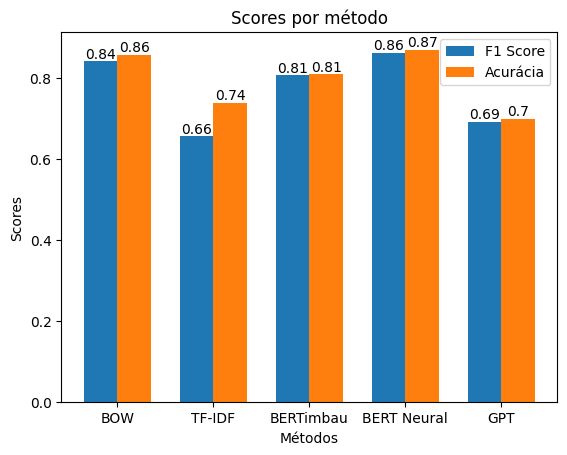

In [25]:
import matplotlib.pyplot as plt

f1_scores = [f1_bow, f1_tfidf, f1_bert, f1_bert_neural, f1_gpt]
acc_scores = [acc_bow, acc_tfidf, acc_bert, acc_bert_neural, acc_gpt]
methods = ['BOW', 'TF-IDF', 'BERTimbau', 'BERT Neural', 'GPT']

fig, ax = plt.subplots()
bar_width = 0.35
bar_l = np.arange(len(methods))
tick_pos = [i + (bar_width / 2) for i in bar_l]

bar1 = ax.bar(bar_l, f1_scores, width=bar_width, label='F1 Score')
bar2 = ax.bar(bar_l + bar_width, acc_scores, width=bar_width, label='Acurácia')

ax.set_xlabel('Métodos')
ax.set_ylabel('Scores')
ax.set_title('Scores por método')
ax.set_xticks(tick_pos)
ax.set_xticklabels(methods)
ax.legend()

# Adiciona os valores em cima das barras
for bar in bar1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

for bar in bar2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.show()

6. Qual estratégia é a melhor? Onde os modelos erram mais? Crie as matrizes de confusão para analisar esses modelos. 

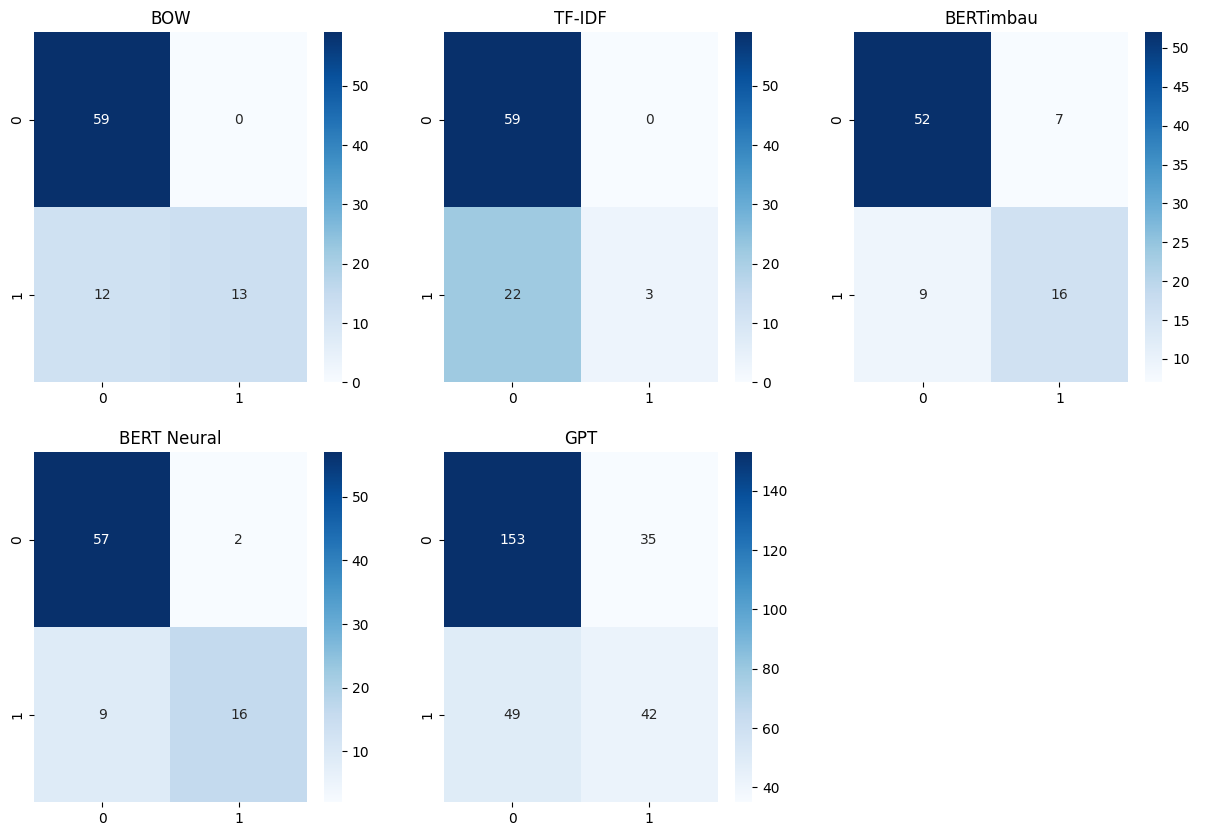

In [26]:
# 6. Qual estratégia é a melhor? Onde os modelos erram mais? Crie as matrizes de confusão para analisar esses modelos. 
from sklearn.metrics import confusion_matrix

confusion_matrix_bow = confusion_matrix(y_test_bow, y_pred_bow)
confusion_matrix_tfidf = confusion_matrix(y_test_tfidf, y_pred_tfidf)
confusion_matrix_bert = confusion_matrix(y_test_bert, y_pred_bert)
confusion_matrix_bert_neural = confusion_matrix(y_test_bert_neural, y_pred_bert_neural)
confusion_matrix_gpt = confusion_matrix(df['classificacao'], y_pred_gpt)

# Plot confusion matrix
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

sns.heatmap(confusion_matrix_bow, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_title('BOW')

sns.heatmap(confusion_matrix_tfidf, annot=True, fmt='d', cmap='Blues', ax=axes[0, 1])
axes[0, 1].set_title('TF-IDF')

sns.heatmap(confusion_matrix_bert, annot=True, fmt='d', cmap='Blues', ax=axes[0, 2])
axes[0, 2].set_title('BERTimbau')

sns.heatmap(confusion_matrix_bert_neural, annot=True, fmt='d', cmap='Blues', ax=axes[1, 0])
axes[1, 0].set_title('BERT Neural')

sns.heatmap(confusion_matrix_gpt, annot=True, fmt='d', cmap='Blues', ax=axes[1, 1])
axes[1, 1].set_title('GPT')

axes[1, 2].axis('off')
plt.show()